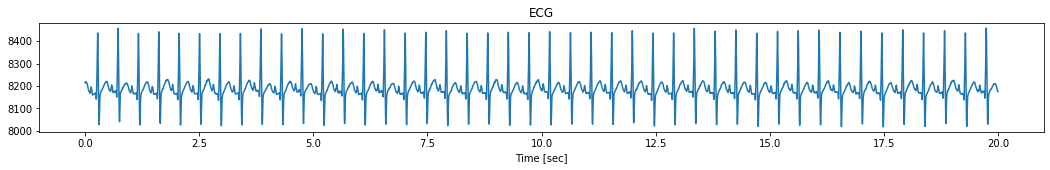

HR_for_resemple [134.52914798 134.52914798 134.52914798 134.52914798 134.52914798
 133.33333333 133.92857143 132.74336283 133.33333333 132.74336283
 133.33333333 133.33333333 132.74336283 132.15859031 132.74336283
 133.33333333 131.57894737 133.33333333 132.74336283 132.15859031
 132.74336283 132.15859031 132.74336283 132.74336283 132.74336283
 132.74336283 132.74336283 132.15859031 131.57894737 132.15859031
 131.57894737 131.57894737 132.15859031 131.57894737 131.57894737
 129.87012987 131.57894737 131.00436681 131.57894737 130.43478261
 132.15859031 130.43478261]



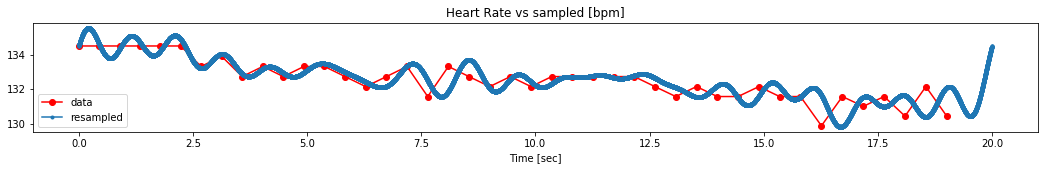

HR Amp is:  [134.52914798 134.52914798 134.52914798 134.52914798 134.52914798
 134.52914798 133.33333333 133.92857143 132.74336283 133.33333333
 132.74336283 133.33333333 133.33333333 132.74336283 132.15859031
 132.74336283 133.33333333 131.57894737 133.33333333 132.74336283
 132.15859031 132.74336283 132.15859031 132.74336283 132.74336283
 132.74336283 132.74336283 132.74336283 132.15859031 131.57894737
 132.15859031 131.57894737 131.57894737 132.15859031 131.57894737
 131.57894737 129.87012987 131.57894737 131.00436681 131.57894737
 130.43478261 132.15859031 130.43478261]

HR Amp size:  43

HR time is:  [ 0.     0.446  0.892  1.338  1.784  2.23   2.678  3.127  3.577  4.028
  4.479  4.93   5.38   5.831  6.284  6.737  7.188  7.641  8.094  8.545
  8.998  9.451  9.904 10.357 10.809 11.261 11.713 12.165 12.618 13.073
 13.528 13.983 14.439 14.894 15.349 15.805 16.264 16.723 17.18  17.637
 18.095 18.552 19.009]

HR time size:  43

sampling hr is:  [134.52914798 134.53884619 134.54850855 ...

In [14]:
###################################################   ECG / HR   ##############################################

import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.signal import find_peaks
import os

START_POINT = 0
END_POINT = 20
F = 1000
t = np.arange(START_POINT, END_POINT, 0.002)
t_size = len(t)
ecg = []
with open('samples/268269-2431-MDC_ECG_ELEC_POTL_II-500.csv', 'r') as f: ## reading the ECG file
    reader = csv.reader(f)
    for row in reader: ## append lines to one line
        ecg.append(float(row[1]))
    ecg = np.asarray(ecg) # convert ecg from list to an array
    ecg = ecg[:t_size] ## taknig the samples in length of t vector
    
    plt.figure(figsize=(18, 2)) 
    plt.plot(t,ecg)
    plt.title('ECG')
    plt.xlabel('Time [sec]')
    plt.show()


#####  ECG to HR  ######################    
    
    
peaks_ind, _ = find_peaks(ecg, height=8300) # treshold for finding peaks is 8300
ecg = np.asarray(ecg) # convert from list to array - now can be used by array functions

peaks_time = peaks_ind*[0.002] # moving from indexes to time domain
T = np.diff(peaks_time) # vector of time spaces between every two peaks - vector of T_i
f = 1/T # vector of frequencies - beats per second - f_i = 1 / T_i

HR_Amp = f*60 # heart rate = beats per minute - vector 
peaks_time = peaks_time[:-1] # delete the last column - to be in the same length  
HR_t = peaks_time + (T/2) # we set the time to be between two peaks
HR_time_vec = HR_t - HR_t[0] # starting time vector from zero
HR_time_duration = HR_time_vec[len(HR_time_vec)-1] # 19.009
HR_for_resemple = HR_Amp[1 : len(HR_time_vec)]
print("HR_for_resemple",HR_for_resemple)
print("")

####   sampling   #####

#samples = 20000
hr_sampled_graph_mat = signal.resample(HR_Amp, F*(END_POINT-START_POINT) , t=HR_time_vec) ## 20000 samples of HR_Amp graph
hr_sampled_graph = hr_sampled_graph_mat[0]
sampling_time_vec = hr_sampled_graph_mat[1]
sampling_time_vec_duration = sampling_time_vec[len(sampling_time_vec)-1]
#sampling_time_vec = np.arange(START_POINT, END_POINT, 1/F)
#sampling_time_vec = np.arange(0, HR_time_duration, HR_time_duration/samples)
sampling_time_vec_temp = np.linspace(0, 20, F*(END_POINT-START_POINT), endpoint=False)

'''
plt.figure(figsize=(18, 2))
plt.plot(HR_time_vec,HR_Amp,'ro-')
plt.plot(sampling_time_vec, hr_sampled_graph,'.-')
plt.title('Heart Rate vs sampled [bpm]')
plt.xlabel('Time [sec]')
plt.show()
'''

plt.figure(figsize=(18, 2))
plt.plot(HR_time_vec, HR_Amp, 'ro-', sampling_time_vec_temp, hr_sampled_graph,'.-')
#plt.plot(sampling_time_vec, hr_sampled_graph,'.-')
plt.legend(['data', 'resampled'], loc='best')
plt.title('Heart Rate vs sampled [bpm]')
plt.xlabel('Time [sec]')
plt.show()



print("HR Amp is: ", HR_Amp)
print("")
print("HR Amp size: ", len(HR_Amp))
print("")

print("HR time is: ", HR_time_vec)
print("")
print("HR time size: ", len(HR_time_vec))
print("")

print("sampling hr is: ", hr_sampled_graph)
print("")
print("sampling hr row size: ", len(hr_sampled_graph))
print("")

print("sampling time is: ", sampling_time_vec)
print("")
print("sampling time size: ", len(sampling_time_vec))
print("")

print("sampling_time_vec_duration is", sampling_time_vec_duration)
print("")





#print("Sampled HR time is: ", t_new[:3])
#print("vector size", len(t_new))




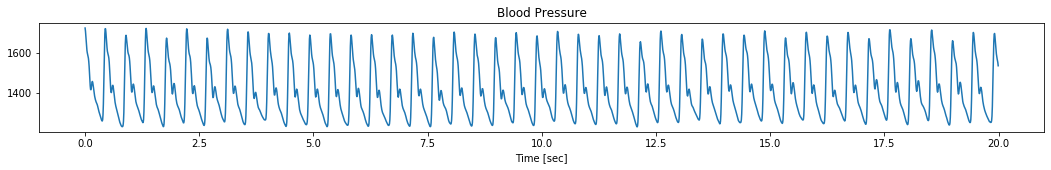

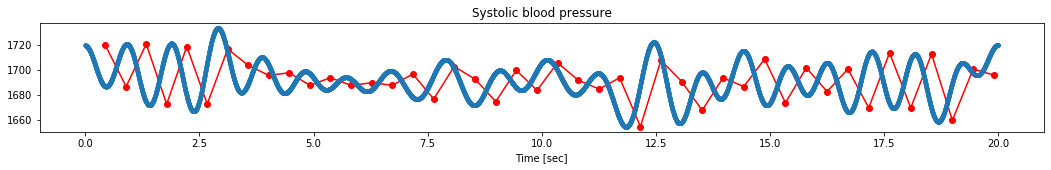

"\nplt.figure(figsize=(18, 2))\nplt.plot(t_new, sys_sampled_graph,'.-') # sys graph and sys_sampled graph\nplt.title('Sampled Systolic blood pressure')\nplt.xlabel('Time [sec]')\nplt.show()\n"

In [2]:
################################################   BP / SYS_BP   ##############################################

import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
t = np.arange(0, 20, 0.008)
t_size = len(t)
#print(size)
bp = []
with open('samples/268269-2431-MDC_PRESS_BLD_ART_ABP-125.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        bp.append(float(row[1]))
    #print(t)
    #print(bp[:size])
    bp = bp[:t_size]
    plt.figure(figsize=(18, 2))
    plt.plot(t,bp)
    plt.title('Blood Pressure')
    plt.xlabel('Time [sec]')
    plt.show()

peaks_ind, _ = find_peaks(bp, height=1600)
bp = np.asarray(bp)

sys_bp_time = peaks_ind*[0.008] # moving from indexes to time domain
#sys_bp_time = sys_bp_time - sys_bp_time[0]
sys_bp_Amp = bp[peaks_ind]

samples = 10000
sys_sampled_graph = signal.resample(sys_bp_Amp, samples) # sampling the systolic graph - 10000 samples - *4 more then the original
t_new = np.arange(0, 20, 20/samples)
#t_new = t_new + sys_bp_time[0]

plt.figure(figsize=(18, 2))
plt.plot(sys_bp_time,sys_bp_Amp,'ro-') # sys graph and sys_sampled graph
plt.plot(t_new, sys_sampled_graph,'.-') # sys graph and sys_sampled graph
plt.title('Systolic blood pressure')
plt.xlabel('Time [sec]')
plt.show()

'''
plt.figure(figsize=(18, 2))
plt.plot(t_new, sys_sampled_graph,'.-') # sys graph and sys_sampled graph
plt.title('Sampled Systolic blood pressure')
plt.xlabel('Time [sec]')
plt.show()
'''

#print("sys_bp_time time is: ", sys_bp_time)
#print("")
#print("Sampled sys_bp_Amp is: ", sys_sampled_graph[:3])
#print("vector size", len(sys_sampled_graph))




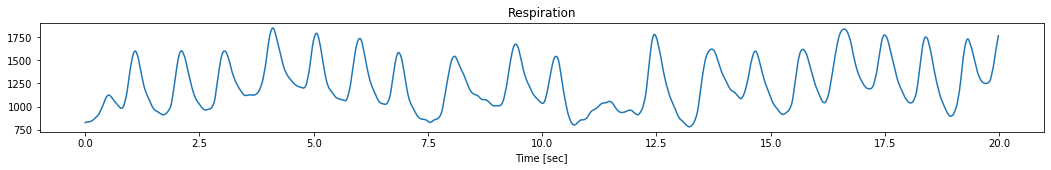

t is:  [ 0.     0.984  1.984  2.984  3.928  4.832  5.872  7.152  8.264  9.784
 11.488 12.592 13.592 14.56  15.448 16.336 17.248]


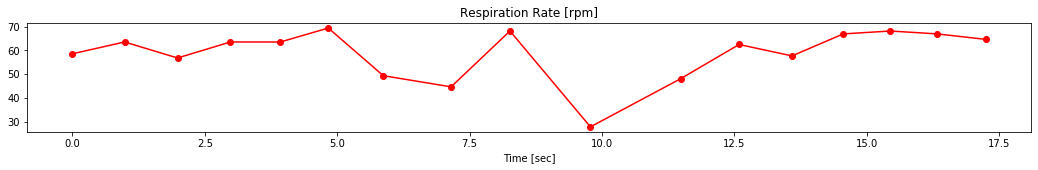

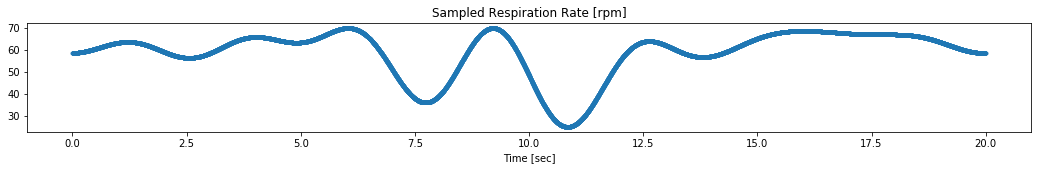

In [3]:
################################################  Respiration  ##############################################

import csv
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(0, 20, 0.016)
size = len(t)
#print(size)
resp = []
with open('samples/268269-2431-MDC_RESP-62.5.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        resp.append(float(row[1])) # insert data to resp array
    #print(resp[:size])
    resp = resp[:size]
    plt.figure(figsize=(18, 2))
    plt.plot(t,resp)
    plt.title('Respiration')
    plt.xlabel('Time [sec]')
    plt.show()
    
peaks_ind, _ = find_peaks(resp, height=1300)
resp = np.asarray(resp)
peaks_time = peaks_ind*[0.016] # moving from indexes to time domain
T = np.diff(peaks_time) # time space between every two peaks - period time
f = 1/T # frecuency - resp per second
resp = f*60 # respiration rate = respiration per minute
peaks_time = peaks_time[:-1] # delete the last column - to be in the same length  
t = peaks_time + (T/2) # we set the time to be between two peaks
t = t - t[0] # make t start from 0
print("t is: ", t)

samples = 10000
res_sampled_graph = signal.resample(resp, samples)
t_new = np.arange(0, 20, 20/samples)




plt.figure(figsize=(18, 2))
plt.plot(t,resp,'ro-')
plt.title('Respiration Rate [rpm]')
plt.xlabel('Time [sec]')
plt.show()


plt.figure(figsize=(18, 2))
plt.plot(t_new, res_sampled_graph,'.-')
plt.title('Sampled Respiration Rate [rpm]')
plt.xlabel('Time [sec]')
plt.show()


###################### showing peaks ##########
#print(peaks.shape)
#print(peaks)
#plt.figure(figsize=(18, 2))
#plt.plot(resp)
#plt.plot(peaks, resp[peaks], "x")
#plt.show()

In [4]:
"""
diff_hr = np.diff(hr)
diff_bp = np.diff(sys_bp_Amp)
diff_bp_size = np.size(diff_bp)
diff_hr_size = np.size(diff_hr)

print("diff_hr size is: ", diff_hr_size)
print("diff_bp size is: ", diff_bp_size)

diff_bp = diff_bp[:diff_hr_size]

diff_bp_size = np.size(diff_bp)
print("diff_bp size is: ", diff_bp_size)


plt.scatter(diff_hr, diff_bp, marker='o')
"""

'\ndiff_hr = np.diff(hr)\ndiff_bp = np.diff(sys_bp_Amp)\ndiff_bp_size = np.size(diff_bp)\ndiff_hr_size = np.size(diff_hr)\n\nprint("diff_hr size is: ", diff_hr_size)\nprint("diff_bp size is: ", diff_bp_size)\n\ndiff_bp = diff_bp[:diff_hr_size]\n\ndiff_bp_size = np.size(diff_bp)\nprint("diff_bp size is: ", diff_bp_size)\n\n\nplt.scatter(diff_hr, diff_bp, marker=\'o\')\n'

In [5]:
############ trying sample hr and bp
"""
print("systolic bp time is:", sys_bp_time) # samples time of systolic blood pressure
print(" ")
print("HR time is: ", HR_t) # samples time of systolic hart rate
print(" ")
HR_t_size = np.size(HR_t)

sys_bp_in_HR_time = [0]*HR_t_size # array - size of hart rate time vector
print(sys_bp_in_HR_time)
#i=0
#while (i < HR_t_size) {   
#  sys_bp_in_HR_time[i] = sys_bp_Amp[]
#}
"""

'\nprint("systolic bp time is:", sys_bp_time) # samples time of systolic blood pressure\nprint(" ")\nprint("HR time is: ", HR_t) # samples time of systolic hart rate\nprint(" ")\nHR_t_size = np.size(HR_t)\n\nsys_bp_in_HR_time = [0]*HR_t_size # array - size of hart rate time vector\nprint(sys_bp_in_HR_time)\n#i=0\n#while (i < HR_t_size) {   \n#  sys_bp_in_HR_time[i] = sys_bp_Amp[]\n#}\n'

In [6]:
#*********************************************   Estimated vs Original  *********************************


HR_X = hr_sampled_graph[0:len(hr_sampled_graph)-1]    # HR [0..N-1] 
#print(HR_X)
#print("HR_X size:", len(HR_X))
#print()

SYS_BP_X = sys_sampled_graph[0:len(sys_sampled_graph)-1]    # SYS_BP [0..N-1]
#print(SYS_BP_X)
#print("SYS_BP_X size:", len(SYS_BP_X))
#print()

R_X = res_sampled_graph[0:len(res_sampled_graph)-1]    # Resh h [0..N-1]
#print(R_X)
#print("R_X size:", len(R_X))
#print()



X = np.column_stack((HR_X, SYS_BP_X, R_X)) # Mat of all signals in columns from 0 to n-1
#print("Matrix X is:")
#print(X)
#print()



HR_Y = hr_sampled_graph[1:len(hr_sampled_graph)] # taking the hr graph except the first sample
#print(HR_Y)
#print("HR_Y size:", len(HR_Y))
#print()


SYS_BP_Y = sys_sampled_graph[1:len(sys_sampled_graph)] # taking the systolic bp graph except the first sample
#print(SYS_BP_Y)
#print("SYS_BP_Y size:", len(SYS_BP_Y))
#print()


R_Y = res_sampled_graph[1:len(res_sampled_graph)] # taking the resp graph except the first sample
#print(R_Y)
#print("R_Y size:", len(R_Y))
#print()



HR_coeff = np.dot(np.linalg.inv(np.dot(X.transpose(),X)),np.dot(X.transpose(),HR_Y))
#print("a1,b1,c1 are:")
#print(HR_coeff)
#print()

BP_coeff = np.dot(np.linalg.inv(np.dot(X.transpose(),X)),np.dot(X.transpose(),SYS_BP_Y))
#print("a2,b2,c2 are:")
#print(BP_coeff)
#print()

R_coeff = np.dot(np.linalg.inv(np.dot(X.transpose(),X)),np.dot(X.transpose(),R_Y))
#print("a3,b3,c3 are:")
#print(R_coeff)
#print()


EST_HR_Y = np.zeros(len(HR_X)) # create the estimated vector for HR
EST_HR_X = np.zeros(len(HR_X)) 
EST_HR_X[0] = HR_X[0]


for i in range(0, len(HR_X)-1): # set the estimated vector for HR
    EST_HR_Y[i] = EST_HR_X[i]*HR_coeff[0] + SYS_BP_X[i]*HR_coeff[1] + R_X[i]*HR_coeff[2]
    if (i < len(HR_X)-1) :
        EST_HR_X[i+1] = EST_HR_Y[i]
    
#print("estimated HR: ", EST_HR_Y)
#print("the size is: ", len(EST_HR_Y))

t_now = t_new[0:len(t_new)-2]
#print("t_now size is: ", len(t_now))
EST_HR_Y = EST_HR_Y[0:len(EST_HR_Y)-1]
#print("the size is: ", len(EST_HR_Y))


plt.figure(figsize=(18, 2))
plt.plot(t_new, hr_sampled_graph,'.-')
plt.plot(t_now, EST_HR_Y,'.-')
plt.title('Heart Rate: original vs estimated [bpm]')
plt.xlabel('Time [sec]')
plt.show()


####**********************BP**********

EST_BP_Y = np.zeros(len(SYS_BP_X)) # create the estimated vector for BP
EST_BP_X = np.zeros(len(SYS_BP_X)) 
EST_BP_X[0] = SYS_BP_X[0]


for i in range(0, len(SYS_BP_X)-1): # set the estimated vector for BP
    EST_BP_Y[i] =  HR_X[i]*BP_coeff[0] + EST_BP_X[i]*BP_coeff[1] + R_X[i]*BP_coeff[2]
    if (i < len(EST_BP_X)-1) :
        EST_BP_X[i+1] = EST_BP_Y[i]
    
EST_BP_Y = EST_BP_Y[0:len(EST_BP_Y)-1]

plt.figure(figsize=(18, 2))
plt.plot(t_new, sys_sampled_graph,'.-')
plt.plot(t_now, EST_BP_Y,'.-')
plt.title('Blood pressure: original vs estimated ')
plt.xlabel('Time [sec]')
plt.show()


####**********************Respiration**********


EST_R_Y = np.zeros(len(R_X)) # create the estimated vector for Respiration
EST_R_X = np.zeros(len(R_X)) 
EST_R_X[0] = R_X[0]


for i in range(0, len(R_X)-1): # set the estimated vector for respiration
    EST_R_Y[i] =  HR_X[i]*R_coeff[0] + SYS_BP_X[i]*R_coeff[1] + EST_R_X[i]*R_coeff[2]
    if (i < len(EST_R_X)-1) :
        EST_R_X[i+1] = EST_R_Y[i]
    
EST_R_Y = EST_R_Y[0:len(EST_R_Y)-1] # delete the last sample

plt.figure(figsize=(18, 2))
plt.plot(t_new, res_sampled_graph,'.-')
plt.plot(t_now, EST_R_Y,'.-')
plt.title('Respiration: original vs estimated ')
plt.xlabel('Time [sec]')
plt.show()

print("original: ", res_sampled_graph)
print()
print("sampled: ", EST_R_Y)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

268269-2424-MDC_ECG_ELEC_POTL_II-500.csv:


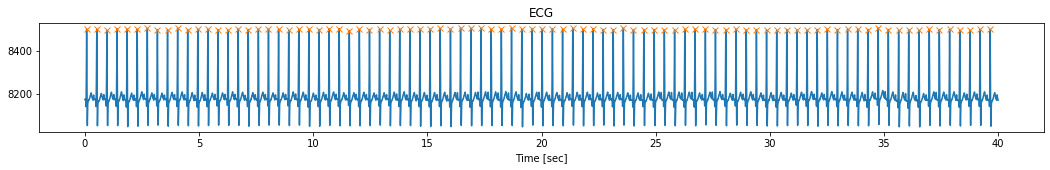

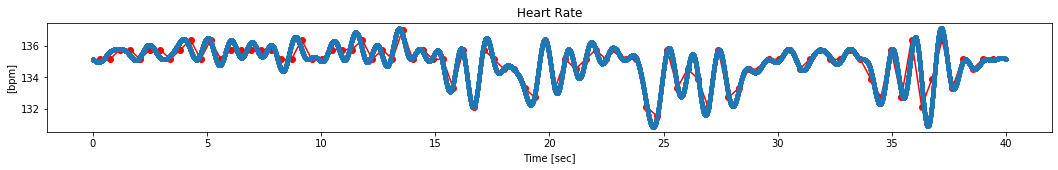

268269-2431-MDC_ECG_ELEC_POTL_II-500.csv:


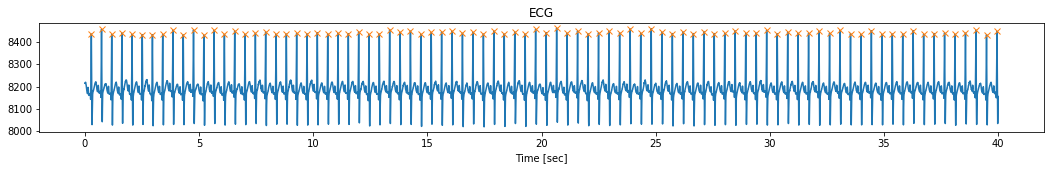

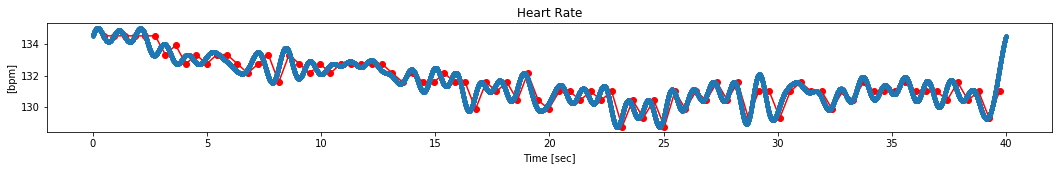

911-7927-MDC_ECG_ELEC_POTL_II-500.csv:


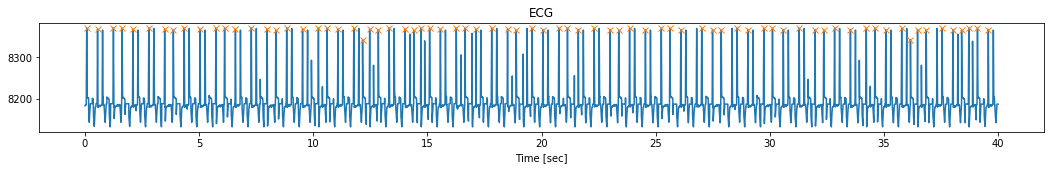

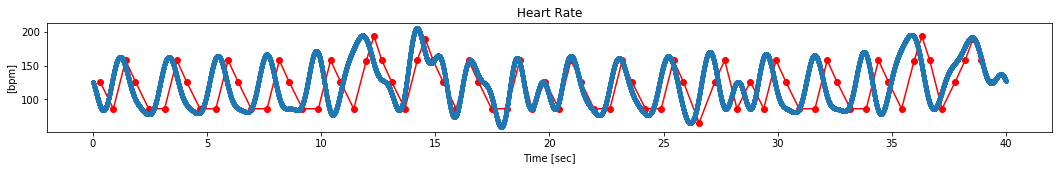

In [13]:
START_POINT=0
END_POINT=40
t = np.arange(START_POINT, END_POINT, 0.002)
F = 1000

ecg = []
hr_list =[]
for filename in os.listdir('sample'):
    if "MDC_ECG_ELEC_POTL_II-500" in filename:
        print(filename+':')
        with open('sample/'+ filename, 'r') as f:
            reader = csv.reader(f)
            for row in reader:
                ecg.append(float(row[1]))
            
            ecg_small = np.array(ecg[START_POINT*500:END_POINT*500])            
            peaks,_=find_peaks(ecg_small, height=8270, distance=155) #60/(220*0.002)
            peaks_sec = (peaks + START_POINT*500) * 0.002
            
            plt.figure(figsize=(18, 2))
            plt.plot(t,ecg_small)
            plt.plot(peaks_sec, ecg_small[peaks], "x")
            plt.title('ECG')
            plt.xlabel('Time [sec]')
            plt.show()
            ecg = []
            
            diffs = np.diff(peaks_sec)
            peaks_sec = peaks_sec[:len(diffs)]+diffs/2
            hr = 60/diffs
            
            sampled_hr = signal.resample(hr, F*(END_POINT-START_POINT))
            sampled_t = np.arange(START_POINT, END_POINT, 1/F)
            
            
            plt.figure(figsize=(18, 2))
            plt.plot(peaks_sec,hr,'ro-')
            plt.plot(sampled_t,sampled_hr,'.-')
            plt.title('Heart Rate')
            plt.xlabel('Time [sec]')
            plt.ylabel('[bpm]')
            plt.show()
            
            '''
            plt.figure(figsize=(18, 2))
            plt.plot(sampled_t,sampled_hr)
            plt.title('Sampled Heart Rate')
            plt.xlabel('Time [sec]')
            plt.show()
            '''
            
            hr_list.append(sampled_hr)

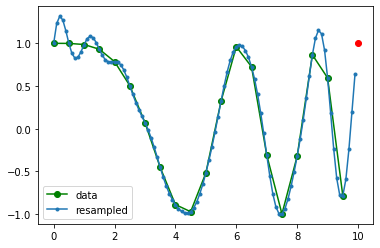

In [12]:
x = np.linspace(0, 10, 20, endpoint=False)
y = np.cos(-x**2/6.0)
f = signal.resample(y, 100)
xnew = np.linspace(0, 10, 100, endpoint=False)

plt.plot(x, y, 'go-', xnew, f, '.-', 10, y[0], 'ro')
plt.legend(['data', 'resampled'], loc='best')
plt.show()